In [1]:
import pandas as pd
import numpy as np
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
asr = pd.read_csv('Dataset(Jan-25)\Amazon Sale Report.csv')
cwc = pd.read_csv('Dataset(Jan-25)\Cloud Warehouse Compersion Chart.csv')
expense = pd.read_csv('Dataset(Jan-25)\Expense IIGF.csv')
isr = pd.read_csv('Dataset(Jan-25)/International sale Report.csv')
may = pd.read_csv('Dataset(Jan-25)\May-2022.csv')
pl = pd.read_csv('Dataset(Jan-25)\P  L March 2021.csv')
sr = pd.read_csv('Dataset(Jan-25)\Sale Report.csv')

In [3]:
print(asr.shape)
print(cwc.shape)
print(expense.shape)
print(isr.shape)
print(may.shape)
print(pl.shape)
print(sr.shape)

(128975, 23)
(50, 4)
(17, 5)
(37432, 10)
(1330, 17)
(1330, 18)
(9271, 7)


PREPROCCESSING

Dropping Duplicates

In [4]:
asr.drop_duplicates()
cwc.drop_duplicates()
expense.drop_duplicates()
isr.drop_duplicates()
may.drop_duplicates()
pl.drop_duplicates()
sr.drop_duplicates()

,index,Product_SKU,Design_Number,Stock_Level,Product_Category,Product_Size,Product_Color
0,0,AN201-RED-L,AN201,5.0,AN : LEGGINGS,L,Red
1,1,AN201-RED-M,AN201,5.0,AN : LEGGINGS,M,Red
2,2,AN201-RED-S,AN201,3.0,AN : LEGGINGS,S,Red
3,3,AN201-RED-XL,AN201,6.0,AN : LEGGINGS,XL,Red
4,4,AN201-RED-XXL,AN201,3.0,AN : LEGGINGS,XXL,Red
...,...,...,...,...,...,...,...
9266,9266,NaN,NaN,NaN,NaN,NaN,NaN
9267,9267,NaN,NaN,NaN,NaN,NaN,NaN
9268,9268,NaN,NaN,NaN,NaN,NaN,NaN
9269,9269,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
asr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   index                   128975 non-null  int64  
 1   Order_ID                128975 non-null  object 
 2   Order_Date              128975 non-null  object 
 3   Order_Status            128975 non-null  object 
 4   Fulfillment_Type        128975 non-null  object 
 5   Sales_Channel           128975 non-null  object 
 6   Shipping_Service_Level  128975 non-null  object 
 7   Product_Style           128975 non-null  object 
 8   Product_SKU             128975 non-null  object 
 9   Product_Category        128975 non-null  object 
 10  Product_Size            128975 non-null  object 
 11  Amazon_Standard_ID      128975 non-null  object 
 12  Courier_Status          122103 non-null  object 
 13  Quantity                128975 non-null  int64  
 14  Currency            

In [6]:
isr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37432 entries, 0 to 37431
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   index               37432 non-null  int64 
 1   Sale_Date           37431 non-null  object
 2   Sale_Month          37407 non-null  object
 3   Customer_Name       36392 non-null  object
 4   Product_Style       36392 non-null  object
 5   Product_SKU         34958 non-null  object
 6   Product_Size        36392 non-null  object
 7   Quantity_Purchased  36392 non-null  object
 8   Price_per_Unit      36392 non-null  object
 9   Gross_Amount        36392 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.9+ MB


FINDING UNIQUE VALUES IN COLUMNS TO IMPUTE OR DROP THEM

In [7]:
asr['Promotion_IDs'].unique()

array([nan,
       'Amazon PLCC Free-Financing Universal Merchant AAT-WNKTBO3K27EJC,Amazon PLCC Free-Financing Universal Merchant AAT-QX3UCCJESKPA2,Amazon PLCC Free-Financing Universal Merchant AAT-5QQ7BIYYQEDN2,Amazon PLCC Free-Financing Universal Merchant AAT-DSJ2QRXXWXVMQ,Amazon PLCC Free-Financing Universal Merchant AAT-CXJHMC2YJUK76,Amazon PLCC Free-Financing Universal Merchant AAT-CC4FAVTYR4X7C,Amazon PLCC Free-Financing Universal Merchant AAT-XXRCW6NZEPZI4,Amazon PLCC Free-Financing Universal Merchant AAT-CXNSLNBROFDW4,Amazon PLCC Free-Financing Universal Merchant AAT-R7GXNZWISTRFA,Amazon PLCC Free-Financing Universal Merchant AAT-WSJLDN3X7KEMO,Amazon PLCC Free-Financing Universal Merchant AAT-VL6FGQVGQVXUS,Amazon PLCC Free-Financing Universal Merchant AAT-EOKPWFWYW7Y6I,Amazon PLCC Free-Financing Universal Merchant AAT-ZYL5UPUNW6T62,Amazon PLCC Free-Financing Universal Merchant AAT-XVPICCHRWDCAI,Amazon PLCC Free-Financing Universal Merchant AAT-ETXQ3XXWMRXBG,Amazon PLCC Free-Fin

In [8]:
asr['Currency'].unique() # impute nan to INR as it is nan because the orders are cancelled

array(['INR', nan], dtype=object)

In [9]:
asr['Courier_Status'].unique() #imputer nan to cancelled

array([nan, 'Shipped', 'Cancelled', 'Unshipped'], dtype=object)

In [10]:
asr['Shipping_Country'].unique() #drop nulls since there are only 33 values

array(['IN', nan], dtype=object)

In [11]:
print(f"Amount of missing values in asr: {asr.isnull().sum().sum()}")
print(f"Amount of missing values in cwc: {cwc.isnull().sum().sum()}")
print(f"Amount of missing values in Expense IIGF: {expense.isnull().sum().sum()}")
print(f"Amount of missing values in International sales report: {isr.isnull().sum().sum()}")
print(f"Amount of missing values in may-2022: {may.isnull().sum().sum()}")
print(f"Amount of missing values in P L march: {pl.isnull().sum().sum()}")
print(f"Amount of missing values in Sales report: {sr.isnull().sum().sum()}")

Amount of missing values in asr: 161445
Amount of missing values in cwc: 60
Amount of missing values in Expense IIGF: 24
Amount of missing values in International sales report: 8740
Amount of missing values in may-2022: 0
Amount of missing values in P L march: 0
Amount of missing values in Sales report: 281


CLEANING AND FORMATING ASR

In [12]:
asr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   index                   128975 non-null  int64  
 1   Order_ID                128975 non-null  object 
 2   Order_Date              128975 non-null  object 
 3   Order_Status            128975 non-null  object 
 4   Fulfillment_Type        128975 non-null  object 
 5   Sales_Channel           128975 non-null  object 
 6   Shipping_Service_Level  128975 non-null  object 
 7   Product_Style           128975 non-null  object 
 8   Product_SKU             128975 non-null  object 
 9   Product_Category        128975 non-null  object 
 10  Product_Size            128975 non-null  object 
 11  Amazon_Standard_ID      128975 non-null  object 
 12  Courier_Status          122103 non-null  object 
 13  Quantity                128975 non-null  int64  
 14  Currency            

In [13]:
asr.isnull().sum()

index                         0
Order_ID                      0
Order_Date                    0
Order_Status                  0
Fulfillment_Type              0
Sales_Channel                 0
Shipping_Service_Level        0
Product_Style                 0
Product_SKU                   0
Product_Category              0
Product_Size                  0
Amazon_Standard_ID            0
Courier_Status             6872
Quantity                      0
Currency                   7795
Sale_Amount                7795
Shipping_City                33
Shipping_State               33
Shipping_Postal_Code         33
Shipping_Country             33
Promotion_IDs             49153
Business_to_Business          0
Fulfilled_By              89698
dtype: int64

In [14]:
asr['Fulfilled_By'] =asr['Fulfilled_By'].fillna('Other')
asr['Promotion_IDs'] =asr['Promotion_IDs'].fillna('No Promotion')
asr['Currency'] =asr['Currency'].fillna('INR')
asr['Sale_Amount'] =asr['Sale_Amount'].fillna(0)
asr['Courier_Status'] =asr['Courier_Status'].fillna('Not Delivered')

In [15]:
asr.isnull().sum()

index                      0
Order_ID                   0
Order_Date                 0
Order_Status               0
Fulfillment_Type           0
Sales_Channel              0
Shipping_Service_Level     0
Product_Style              0
Product_SKU                0
Product_Category           0
Product_Size               0
Amazon_Standard_ID         0
Courier_Status             0
Quantity                   0
Currency                   0
Sale_Amount                0
Shipping_City             33
Shipping_State            33
Shipping_Postal_Code      33
Shipping_Country          33
Promotion_IDs              0
Business_to_Business       0
Fulfilled_By               0
dtype: int64

In [16]:
asr = asr.drop('index', axis=1) #index wont lineup so has to dropped

In [17]:
asr['Order_Date'] =  pd.to_datetime(asr['Order_Date'])
asr['Shipping_Postal_Code'] = asr['Shipping_Postal_Code'].astype('Int64')

In [18]:
asr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Order_ID                128975 non-null  object        
 1   Order_Date              128975 non-null  datetime64[ns]
 2   Order_Status            128975 non-null  object        
 3   Fulfillment_Type        128975 non-null  object        
 4   Sales_Channel           128975 non-null  object        
 5   Shipping_Service_Level  128975 non-null  object        
 6   Product_Style           128975 non-null  object        
 7   Product_SKU             128975 non-null  object        
 8   Product_Category        128975 non-null  object        
 9   Product_Size            128975 non-null  object        
 10  Amazon_Standard_ID      128975 non-null  object        
 11  Courier_Status          128975 non-null  object        
 12  Quantity                128975

In [19]:
asr.head()

,Order_ID,Order_Date,Order_Status,Fulfillment_Type,Sales_Channel,Shipping_Service_Level,Product_Style,Product_SKU,Product_Category,Product_Size,...,Quantity,Currency,Sale_Amount,Shipping_City,Shipping_State,Shipping_Postal_Code,Shipping_Country,Promotion_IDs,Business_to_Business,Fulfilled_By
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,No Promotion,False,Easy Ship
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Other
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,No Promotion,False,Easy Ship
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,1,INR,574.00,CHENNAI,TAMIL NADU,600073,IN,No Promotion,False,Other


In [20]:
print(f"Amount of missing values in asr: {asr.isnull().sum().sum()}")
print(f"Amount of missing values in cwc: {cwc.isnull().sum().sum()}")
print(f"Amount of missing values in Expense IIGF: {expense.isnull().sum().sum()}")
print(f"Amount of missing values in International sales report: {isr.isnull().sum().sum()}")
print(f"Amount of missing values in may-2022: {may.isnull().sum().sum()}")
print(f"Amount of missing values in P L march: {pl.isnull().sum().sum()}")
print(f"Amount of missing values in Sales report: {sr.isnull().sum().sum()}")

Amount of missing values in asr: 132
Amount of missing values in cwc: 60
Amount of missing values in Expense IIGF: 24
Amount of missing values in International sales report: 8740
Amount of missing values in may-2022: 0
Amount of missing values in P L march: 0
Amount of missing values in Sales report: 281


CLEANING AND FORMATTING ISR

In [21]:
isr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37432 entries, 0 to 37431
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   index               37432 non-null  int64 
 1   Sale_Date           37431 non-null  object
 2   Sale_Month          37407 non-null  object
 3   Customer_Name       36392 non-null  object
 4   Product_Style       36392 non-null  object
 5   Product_SKU         34958 non-null  object
 6   Product_Size        36392 non-null  object
 7   Quantity_Purchased  36392 non-null  object
 8   Price_per_Unit      36392 non-null  object
 9   Gross_Amount        36392 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.9+ MB


In [22]:
isr.isnull().sum()

index                    0
Sale_Date                1
Sale_Month              25
Customer_Name         1040
Product_Style         1040
Product_SKU           2474
Product_Size          1040
Quantity_Purchased    1040
Price_per_Unit        1040
Gross_Amount          1040
dtype: int64

In [23]:
isr.dropna(subset=['Product_SKU'], inplace=True) #Product_SKu cannot be imputed

In [24]:
isr = isr.drop('index', axis=1) #drop index as its not alligned after dropping NaN values

In [25]:
isr.isnull().sum()

Sale_Date             0
Sale_Month            0
Customer_Name         0
Product_Style         0
Product_SKU           0
Product_Size          0
Quantity_Purchased    0
Price_per_Unit        0
Gross_Amount          0
dtype: int64

In [26]:
isr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34958 entries, 0 to 37431
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Sale_Date           34958 non-null  object
 1   Sale_Month          34958 non-null  object
 2   Customer_Name       34958 non-null  object
 3   Product_Style       34958 non-null  object
 4   Product_SKU         34958 non-null  object
 5   Product_Size        34958 non-null  object
 6   Quantity_Purchased  34958 non-null  object
 7   Price_per_Unit      34958 non-null  object
 8   Gross_Amount        34958 non-null  object
dtypes: object(9)
memory usage: 2.7+ MB


In [27]:
print(isr['Gross_Amount'][19675])
print(isr['Quantity_Purchased'][19675])
print(isr['Price_per_Unit'][19675])

Stock
RATE
GROSS AMT


In [28]:
isr = isr.drop(19675)

In [29]:
isr['Sale_Month'].unique()

array(['21-Jun', '21-Jul', '21-Aug', '21-Sep', '21-Oct', '21-Nov',
       '21-Dec', '22-Jan', '22-Feb', '22-Mar', '6/5/2021', '6/8/2021',
       '6/11/2021', '6/15/2021', '6/17/2021', '6/18/2021', '6/19/2021',
       '6/23/2021', '6/24/2021', '6/28/2021', '6/29/2021', '7/1/2021',
       '7/8/2021', '7/9/2021', '7/10/2021', '7/12/2021', '7/13/2021',
       '7/16/2021', '7/22/2021', '7/24/2021', '7/26/2021', '7/28/2021',
       '7/29/2021', '7/30/2021', '7/31/2021', '8/4/2021', '8/5/2021',
       '8/6/2021', '8/7/2021', '8/10/2021', '8/14/2021', '8/15/2021',
       '8/16/2021', '8/19/2021', '8/20/2021', '8/21/2021', '8/25/2021',
       '8/26/2021', '9/3/2021', '9/6/2021', '9/7/2021', '9/9/2021',
       '9/11/2021', '9/14/2021', '9/15/2021', '9/16/2021', '9/18/2021',
       '9/21/2021', '9/22/2021', '9/24/2021', '9/27/2021', '9/29/2021',
       '10/1/2021', '10/2/2021', '10/4/2021', '10/5/2021', '10/6/2021',
       '10/8/2021', '10/9/2021', '10/11/2021', '10/12/2021', '10/13/2021',
      

In [30]:
isr = isr.drop('Sale_Month', axis=1) #data can be taken from Sale date

In [31]:
isr['Sale_Date'].unique()

array(['6/5/2021', '6/8/2021', '6/11/2021', '6/15/2021', '6/17/2021',
       '6/18/2021', '6/19/2021', '6/23/2021', '6/24/2021', '6/28/2021',
       '6/29/2021', '7/1/2021', '7/8/2021', '7/9/2021', '7/10/2021',
       '7/12/2021', '7/13/2021', '7/16/2021', '7/22/2021', '7/24/2021',
       '7/26/2021', '7/28/2021', '7/29/2021', '7/30/2021', '7/31/2021',
       '8/4/2021', '8/5/2021', '8/6/2021', '8/7/2021', '8/10/2021',
       '8/14/2021', '8/15/2021', '8/16/2021', '8/19/2021', '8/20/2021',
       '8/21/2021', '8/25/2021', '8/26/2021', '9/3/2021', '9/6/2021',
       '9/7/2021', '9/9/2021', '9/11/2021', '9/14/2021', '9/15/2021',
       '9/16/2021', '9/18/2021', '9/21/2021', '9/22/2021', '9/24/2021',
       '9/27/2021', '9/29/2021', '10/1/2021', '10/2/2021', '10/4/2021',
       '10/5/2021', '10/6/2021', '10/8/2021', '10/9/2021', '10/11/2021',
       '10/12/2021', '10/13/2021', '10/14/2021', '10/15/2021',
       '10/18/2021', '10/20/2021', '10/21/2021', '10/23/2021',
       '10/26/2021', '

In [32]:
isr['Customer_Name'].unique()

array(['REVATHY LOGANATHAN', 'FARIA ESSOPP', 'MANGALAM SHOP',
       'THANA NAGISSWARY L MARIMUTHU', 'MR.ALWAR MURALI',
       'RAZIA ROSEANE NASER', 'SIRI PADALA', 'FUSION FASHIONS CORP.',
       'MIZNA WAHEEDH', 'AMANI CONCEPT TRADING LLC (KAPDA)', 'NITHARSHA',
       'SYEDA MORSHED', 'VINTAGE INDIA NYC', 'M/S CHARISMAKURTIES(DUBAI)',
       'MULBERRIES BOUTIQUE', 'COTTON CLOSET LTD', 'THANA MARIMUTHU',
       'SHWETA', 'MONIYSHAA', 'AANCHOL', 'KHUSBOO BEEHARRY', 'ARUNA DEVI',
       'YAMUNAH PUSPANATHAN', 'RISHIKESH DASHPUTRE', 'REGA',
       'SURE FASHIONS LLC', 'MR ALWAR MURALI', 'KOGILA SELLAPPAN',
       'MONISYAA', 'VINODHA PUSPANATHAN', 'REKA RASAKODY', 'ARKH FASHION',
       'PUVANES GANNASIN', 'VINI’S AUTHENTIC INDIAN ETHNIC WEAR',
       'BINCY SKARIA', 'YASHWINI REDDY', 'BANUJA RASAKODY',
       'VAHLAARMATHY', 'AKASH KAUSHAL', 'KIRUTHIKA V SURESHBABU',
       'RIVAAN LLC', 'SINDHU', 'DHENOOGA RAVINTHERAN',
       'VAHARSHA BOUTIQUE', 'MANISH DHOORUNDHUR', 'RINO SANDARAN',

In [33]:
isr['Gross_Amount'] = pd.to_numeric(isr['Gross_Amount']).astype(np.float64)
isr['Price_per_Unit'] = pd.to_numeric(isr['Price_per_Unit']).astype(np.float64)
isr['Quantity_Purchased'] = pd.to_numeric(isr['Quantity_Purchased'])


In [34]:
isr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34957 entries, 0 to 37431
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sale_Date           34957 non-null  object 
 1   Customer_Name       34957 non-null  object 
 2   Product_Style       34957 non-null  object 
 3   Product_SKU         34957 non-null  object 
 4   Product_Size        34957 non-null  object 
 5   Quantity_Purchased  34957 non-null  float64
 6   Price_per_Unit      34957 non-null  float64
 7   Gross_Amount        34957 non-null  float64
dtypes: float64(3), object(5)
memory usage: 2.4+ MB


CLEANING AND FORMATTING SR

In [35]:
asr.dropna(inplace=True)
cwc.dropna(inplace=True)
expense.dropna(inplace=True)
expense.dropna(inplace=True)
sr.dropna(inplace=True)
pl.dropna(inplace=True)
may.dropna(inplace=True)

In [36]:
sr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9188 entries, 0 to 9234
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             9188 non-null   int64  
 1   Product_SKU       9188 non-null   object 
 2   Design_Number     9188 non-null   object 
 3   Stock_Level       9188 non-null   float64
 4   Product_Category  9188 non-null   object 
 5   Product_Size      9188 non-null   object 
 6   Product_Color     9188 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 574.2+ KB


In [37]:
sr.head()

,index,Product_SKU,Design_Number,Stock_Level,Product_Category,Product_Size,Product_Color
0,0,AN201-RED-L,AN201,5.0,AN : LEGGINGS,L,Red
1,1,AN201-RED-M,AN201,5.0,AN : LEGGINGS,M,Red
2,2,AN201-RED-S,AN201,3.0,AN : LEGGINGS,S,Red
3,3,AN201-RED-XL,AN201,6.0,AN : LEGGINGS,XL,Red
4,4,AN201-RED-XXL,AN201,3.0,AN : LEGGINGS,XXL,Red


In [38]:
sr['Stock_Level'] = pd.to_numeric(sr['Stock_Level']).astype(np.int64)

In [39]:
sr = sr.drop('index', axis=1) #Index does not lineup after dropping nulls

CLEANING AND FORMATTING May-2022 and P&L MARCH 2021

In [40]:
pl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   index                   1330 non-null   int64 
 1   Product_SKU             1330 non-null   object
 2   Product_Style_ID        1330 non-null   object
 3   Product_Catalog         1330 non-null   object
 4   Product_Category        1330 non-null   object
 5   Product_Weight          1330 non-null   object
 6   Transfer_Price_Level_1  1330 non-null   object
 7   Transfer_Price_Level_2  1330 non-null   object
 8   Old_MRP                 1330 non-null   object
 9   Final_Old_MRP           1330 non-null   object
 10  Ajio_MRP                1330 non-null   object
 11  Amazon_MRP              1330 non-null   object
 12  Amazon_FBA_MRP          1330 non-null   object
 13  Flipkart_MRP            1330 non-null   object
 14  Limeroad_MRP            1330 non-null   object
 15  Mynt

In [41]:
march_columns = ['Product_Weight','Transfer_Price_Level_1', 'Transfer_Price_Level_2', 'Old_MRP',
                 'Final_Old_MRP', 'Ajio_MRP', 'Amazon_MRP', 'Amazon_FBA_MRP',
                 'Flipkart_MRP', 'Limeroad_MRP', 'Myntra_MRP', 'Snapdeal_MRP',
                'Paytm_MRP']

In [42]:
pl.columns = pl.columns.str.strip() # there a leading and trailing whitespaces in some columns

In [43]:
for col in march_columns:
    pl[col] = pd.to_numeric(pl[col], errors='coerce').astype('float64')

In [44]:
pl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   1330 non-null   int64  
 1   Product_SKU             1330 non-null   object 
 2   Product_Style_ID        1330 non-null   object 
 3   Product_Catalog         1330 non-null   object 
 4   Product_Category        1330 non-null   object 
 5   Product_Weight          1257 non-null   float64
 6   Transfer_Price_Level_1  1324 non-null   float64
 7   Transfer_Price_Level_2  1324 non-null   float64
 8   Old_MRP                 1293 non-null   float64
 9   Final_Old_MRP           1293 non-null   float64
 10  Ajio_MRP                1293 non-null   float64
 11  Amazon_MRP              1293 non-null   float64
 12  Amazon_FBA_MRP          1293 non-null   float64
 13  Flipkart_MRP            1293 non-null   float64
 14  Limeroad_MRP            1293 non-null   

In [45]:
may.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             1330 non-null   int64 
 1   Product_SKU       1330 non-null   object
 2   Product_Style_ID  1330 non-null   object
 3   Product_Catalog   1330 non-null   object
 4   Product_Category  1330 non-null   object
 5   Product_Weight    1330 non-null   object
 6   Transfer_Price    1330 non-null   object
 7   Old_MRP           1330 non-null   object
 8   Final_Old_MRP     1330 non-null   object
 9   Ajio_MRP          1330 non-null   object
 10  Amazon_MRP        1330 non-null   object
 11  Amazon_FBA_MRP    1330 non-null   object
 12  Flipkart_MRP      1330 non-null   object
 13  Limeroad_MRP      1330 non-null   object
 14  Myntra_MRP        1330 non-null   object
 15  Paytm_MRP         1330 non-null   object
 16  Snapdeal_MRP      1330 non-null   object
dtypes: int64(1), o

In [46]:
may_columns = ['Product_Weight','Transfer_Price', 'Transfer_Price', 'Old_MRP',
                 'Final_Old_MRP', 'Ajio_MRP', 'Amazon_MRP', 'Amazon_FBA_MRP',
                 'Flipkart_MRP', 'Limeroad_MRP', 'Myntra_MRP', 'Snapdeal_MRP',
                'Paytm_MRP']

In [47]:
for col in may_columns:
    may[col] = pd.to_numeric(may[col], errors='coerce').astype('float64')

In [48]:
may.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             1330 non-null   int64  
 1   Product_SKU       1330 non-null   object 
 2   Product_Style_ID  1330 non-null   object 
 3   Product_Catalog   1330 non-null   object 
 4   Product_Category  1330 non-null   object 
 5   Product_Weight    1257 non-null   float64
 6   Transfer_Price    1324 non-null   float64
 7   Old_MRP           1293 non-null   float64
 8   Final_Old_MRP     1293 non-null   float64
 9   Ajio_MRP          1293 non-null   float64
 10  Amazon_MRP        1293 non-null   float64
 11  Amazon_FBA_MRP    1293 non-null   float64
 12  Flipkart_MRP      1293 non-null   float64
 13  Limeroad_MRP      1293 non-null   float64
 14  Myntra_MRP        1299 non-null   float64
 15  Paytm_MRP         1293 non-null   float64
 16  Snapdeal_MRP      1293 non-null   float64


In [49]:
print(f"Amount of missing values in asr: {asr.isnull().sum().sum()}")
print(f"Amount of missing values in cwc: {cwc.isnull().sum().sum()}")
print(f"Amount of missing values in Expense IIGF: {expense.isnull().sum().sum()}")
print(f"Amount of missing values in International sales report: {isr.isnull().sum().sum()}")
print(f"Amount of missing values in may-2022: {may.isnull().sum().sum()}")
print(f"Amount of missing values in P L march: {pl.isnull().sum().sum()}")
print(f"Amount of missing values in Sales report: {sr.isnull().sum().sum()}")

Amount of missing values in asr: 0
Amount of missing values in cwc: 0
Amount of missing values in Expense IIGF: 0
Amount of missing values in International sales report: 0
Amount of missing values in may-2022: 443
Amount of missing values in P L march: 449
Amount of missing values in Sales report: 0


In [50]:
asr.dropna(inplace=True)
cwc.dropna(inplace=True)
expense.dropna(inplace=True)
expense.dropna(inplace=True)
sr.dropna(inplace=True)
pl.dropna(inplace=True)
may.dropna(inplace=True)

In [51]:
print(f"Amount of missing values in asr: {asr.isnull().sum().sum()}")
print(f"Amount of missing values in cwc: {cwc.isnull().sum().sum()}")
print(f"Amount of missing values in Expense IIGF: {expense.isnull().sum().sum()}")
print(f"Amount of missing values in International sales report: {isr.isnull().sum().sum()}")
print(f"Amount of missing values in may-2022: {may.isnull().sum().sum()}")
print(f"Amount of missing values in P L march: {pl.isnull().sum().sum()}")
print(f"Amount of missing values in Sales report: {sr.isnull().sum().sum()}")

Amount of missing values in asr: 0
Amount of missing values in cwc: 0
Amount of missing values in Expense IIGF: 0
Amount of missing values in International sales report: 0
Amount of missing values in may-2022: 0
Amount of missing values in P L march: 0
Amount of missing values in Sales report: 0


In [52]:
expense.head(-5)

,index,Received_Amount,Unnamed: 1,Expense_Amount,Unnamed: 3


In [53]:
cwc.head(-5)

,index,Shiprocket_Performance,Unnamed: 1,INCREFF_Performance
0,0,Heads,Price (Per Unit),Price (Per Unit)
1,1,Inbound (Fresh Stock and RTO),₹4.00,4
2,2,Outbound,₹7.00,11
3,3,Storage Fee/Cft,₹25.00,Rs 0.15/- Per Day
4,4,Customer Return with Detailed QC,₹6.00,15.5
6,6,Inward,Unloading,• Boxes counted and weighed. Data captured in ...
12,12,Outward,Order receipt,• Orders will be received through integration...
19,19,Returns,Inward,• RTO and Customer Returns are received and I...
21,21,Inventory management,Cycle count,• Daily cycle count to maintain accuracy and ...
37,37,Performance Measure,Measurement,Target


EDA

In [54]:
maypl = pd.merge(may,pl, how = 'outer')

In [55]:
maypl.isnull().sum()

index                     0
Product_SKU               0
Product_Style_ID          0
Product_Catalog           0
Product_Category          0
Product_Weight            0
Transfer_Price            0
Old_MRP                   0
Final_Old_MRP             0
Ajio_MRP                  0
Amazon_MRP                0
Amazon_FBA_MRP            0
Flipkart_MRP              0
Limeroad_MRP              0
Myntra_MRP                0
Paytm_MRP                 0
Snapdeal_MRP              0
Transfer_Price_Level_1    0
Transfer_Price_Level_2    0
dtype: int64

In [56]:
maypl.fillna(0, inplace=True)

In [57]:
maypl.dropna(subset=['Old_MRP'], inplace=True)

In [58]:
maypl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   1221 non-null   int64  
 1   Product_SKU             1221 non-null   object 
 2   Product_Style_ID        1221 non-null   object 
 3   Product_Catalog         1221 non-null   object 
 4   Product_Category        1221 non-null   object 
 5   Product_Weight          1221 non-null   float64
 6   Transfer_Price          1221 non-null   float64
 7   Old_MRP                 1221 non-null   float64
 8   Final_Old_MRP           1221 non-null   float64
 9   Ajio_MRP                1221 non-null   float64
 10  Amazon_MRP              1221 non-null   float64
 11  Amazon_FBA_MRP          1221 non-null   float64
 12  Flipkart_MRP            1221 non-null   float64
 13  Limeroad_MRP            1221 non-null   float64
 14  Myntra_MRP              1221 non-null   

In [59]:
maypl.columns

Index(['index', 'Product_SKU', 'Product_Style_ID', 'Product_Catalog',
       'Product_Category', 'Product_Weight', 'Transfer_Price', 'Old_MRP',
       'Final_Old_MRP', 'Ajio_MRP', 'Amazon_MRP', 'Amazon_FBA_MRP',
       'Flipkart_MRP', 'Limeroad_MRP', 'Myntra_MRP', 'Paytm_MRP',
       'Snapdeal_MRP', 'Transfer_Price_Level_1', 'Transfer_Price_Level_2'],
      dtype='object')

In [60]:
df = maypl.copy()

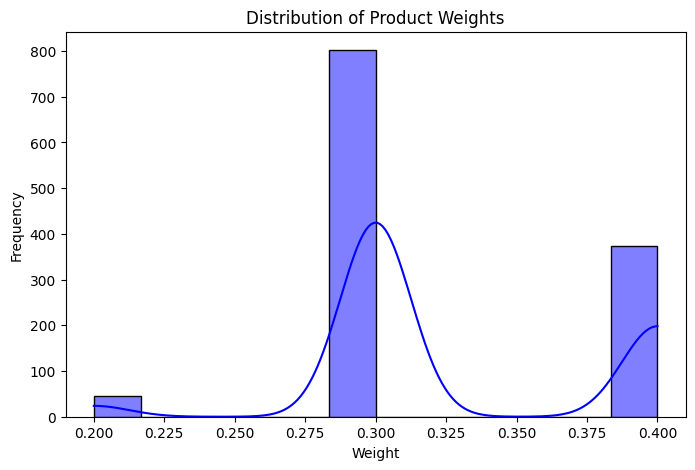

In [61]:
plt.figure(figsize=(8,5))
sns.histplot(df['Product_Weight'], kde=True, color='blue')
plt.title('Distribution of Product Weights')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

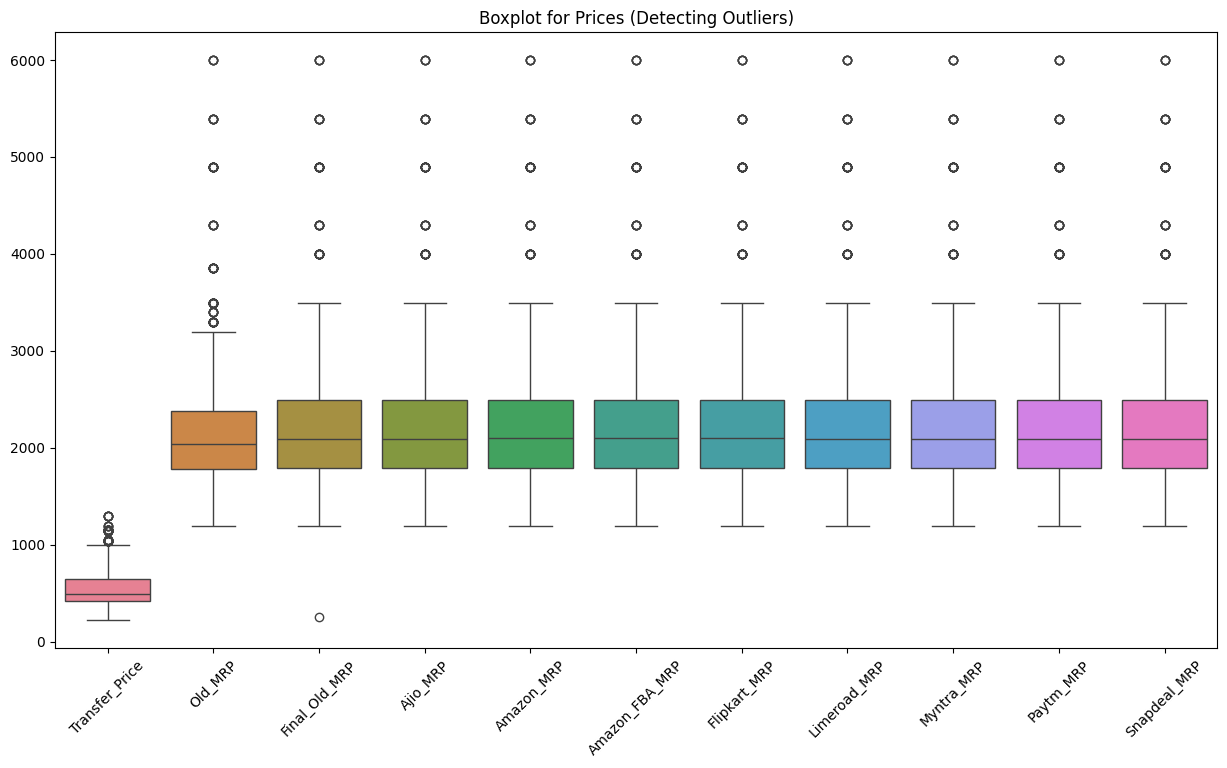

In [62]:
price_cols = ['Transfer_Price', 'Old_MRP', 'Final_Old_MRP', 'Ajio_MRP',
              'Amazon_MRP', 'Amazon_FBA_MRP', 'Flipkart_MRP',
              'Limeroad_MRP', 'Myntra_MRP', 'Paytm_MRP', 'Snapdeal_MRP']

plt.figure(figsize=(15,8))
sns.boxplot(data=df[price_cols])
plt.xticks(rotation=45)
plt.title('Boxplot for Prices (Detecting Outliers)')
plt.show()

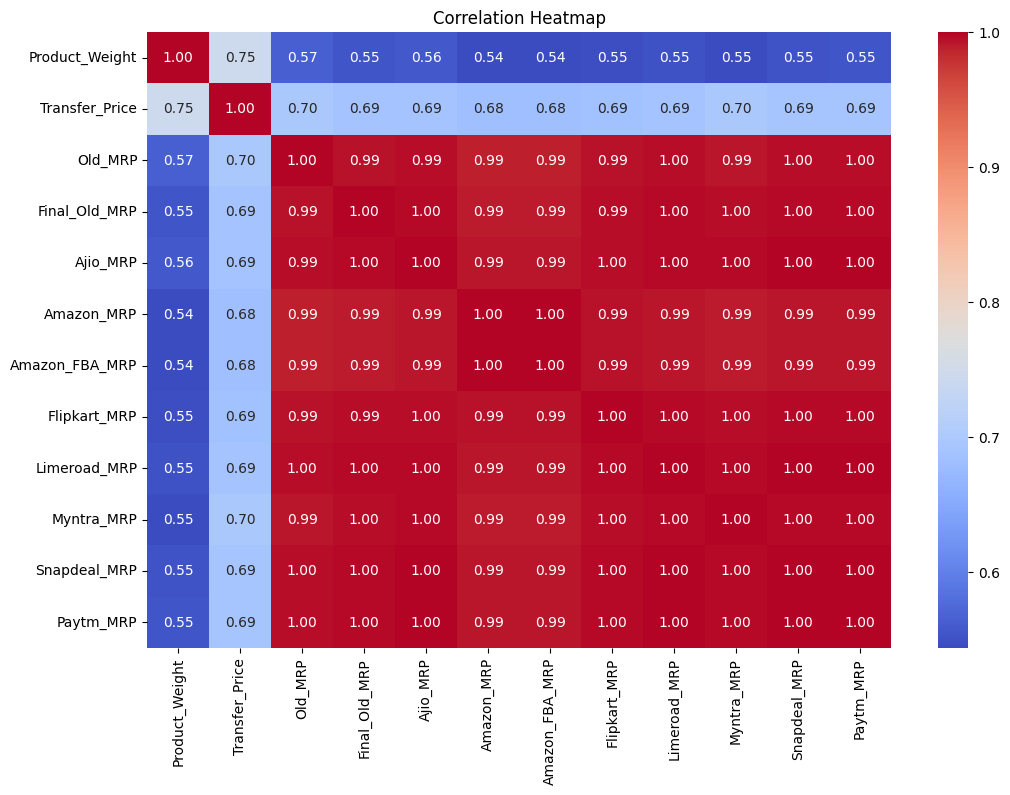

In [63]:
num_columns = ['Product_Weight', 'Transfer_Price', 'Old_MRP',
               'Final_Old_MRP', 'Ajio_MRP', 'Amazon_MRP', 'Amazon_FBA_MRP',
               'Flipkart_MRP', 'Limeroad_MRP', 'Myntra_MRP', 'Snapdeal_MRP',
               'Paytm_MRP']

# Calculate correlation matrix
correlation_matrix = df[num_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\gvars\AppData\Local\Temp\ipykernel_2236\551762010.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_comparison.index, y=price_comparison.values, palette='viridis')


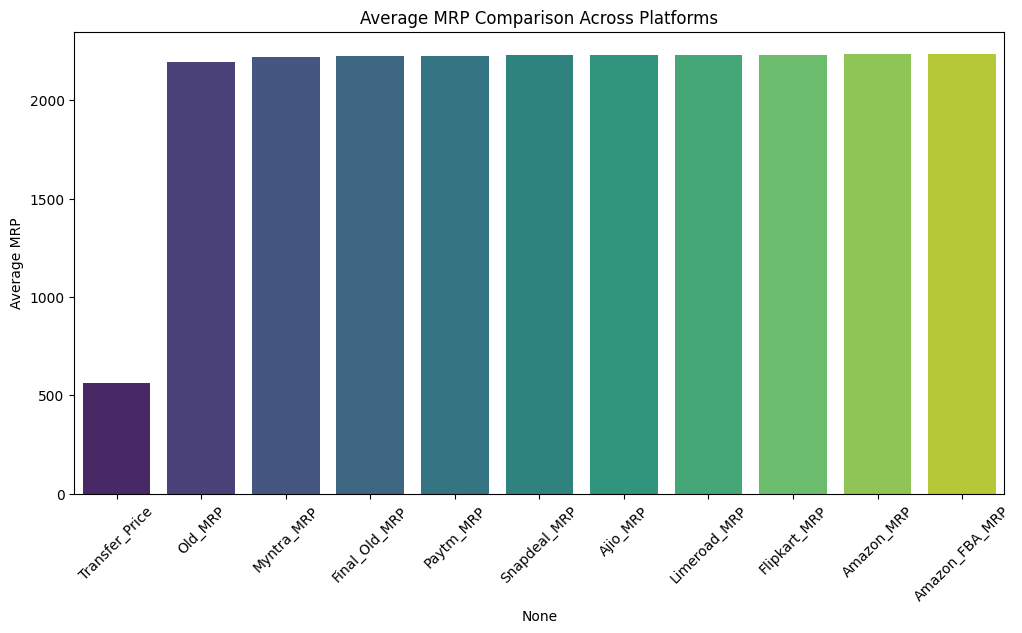

In [64]:
plt.figure(figsize=(12,6))
price_comparison = df[price_cols].mean().sort_values()
sns.barplot(x=price_comparison.index, y=price_comparison.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Average MRP Comparison Across Platforms')
plt.ylabel('Average MRP')
plt.show()

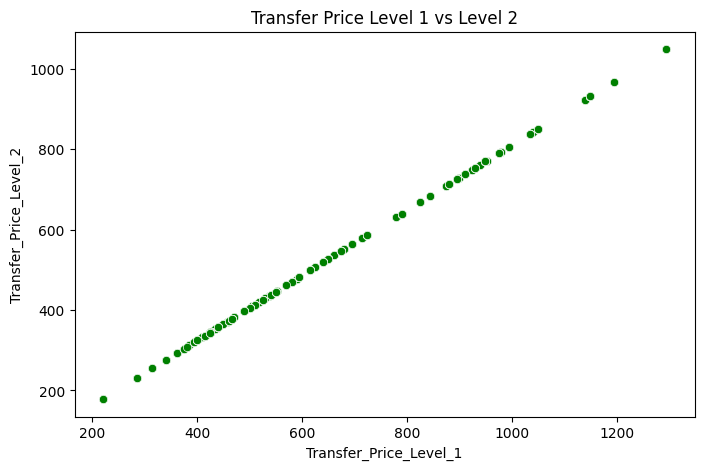

In [65]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Transfer_Price_Level_1', y='Transfer_Price_Level_2', data=df, color='green')
plt.title('Transfer Price Level 1 vs Level 2')
plt.xlabel('Transfer_Price_Level_1')
plt.ylabel('Transfer_Price_Level_2')
plt.show()

In [66]:
filename='Outputfiles/MayMarch.csv'
maypl.to_csv(filename)
asr.to_csv('Outputfiles/UpdatedAsr.csv')
isr.to_csv('Outputfiles/UpdatedIsr.csv')
sr.to_csv('Outputfiles/UpdatedSr.csv')

## **EDA of Amazon Sale Report**

In [67]:
asr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128942 entries, 0 to 128974
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Order_ID                128942 non-null  object        
 1   Order_Date              128942 non-null  datetime64[ns]
 2   Order_Status            128942 non-null  object        
 3   Fulfillment_Type        128942 non-null  object        
 4   Sales_Channel           128942 non-null  object        
 5   Shipping_Service_Level  128942 non-null  object        
 6   Product_Style           128942 non-null  object        
 7   Product_SKU             128942 non-null  object        
 8   Product_Category        128942 non-null  object        
 9   Product_Size            128942 non-null  object        
 10  Amazon_Standard_ID      128942 non-null  object        
 11  Courier_Status          128942 non-null  object        
 12  Quantity                128942 non-

<class 'pandas.core.frame.DataFrame'>
Index: 128942 entries, 0 to 128974
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Order_ID                128942 non-null  object        
 1   Order_Date              128942 non-null  datetime64[ns]
 2   Order_Status            128942 non-null  object        
 3   Fulfillment_Type        128942 non-null  object        
 4   Sales_Channel           128942 non-null  object        
 5   Shipping_Service_Level  128942 non-null  object        
 6   Product_Style           128942 non-null  object        
 7   Product_SKU             128942 non-null  object        
 8   Product_Category        128942 non-null  object        
 9   Product_Size            128942 non-null  object        
 10  Amazon_Standard_ID      128942 non-null  object        
 11  Courier_Status          128942 non-null  object        
 12  Quantity                128942 non-

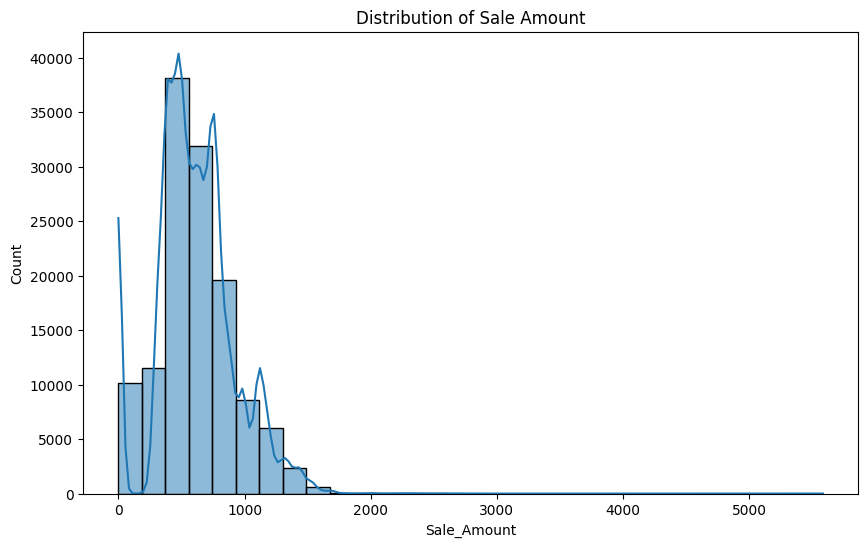

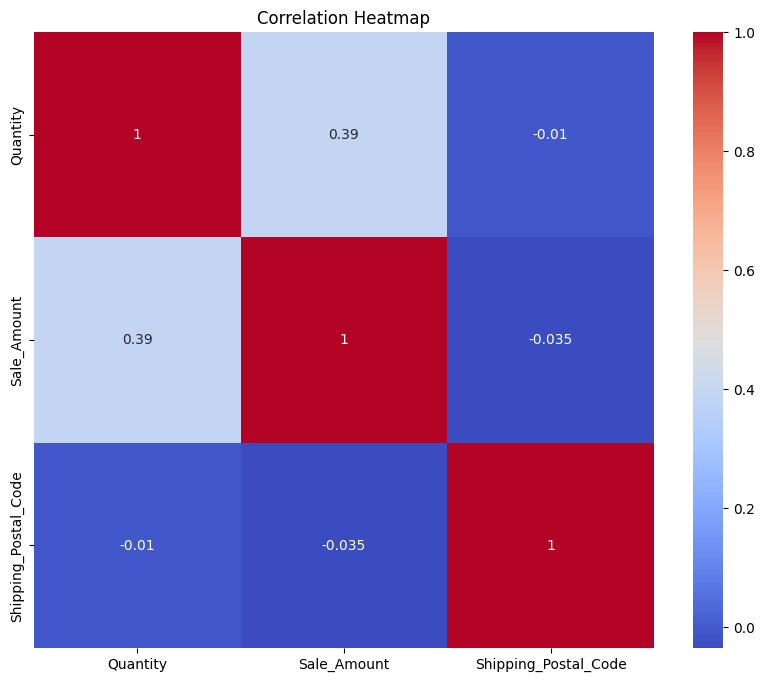

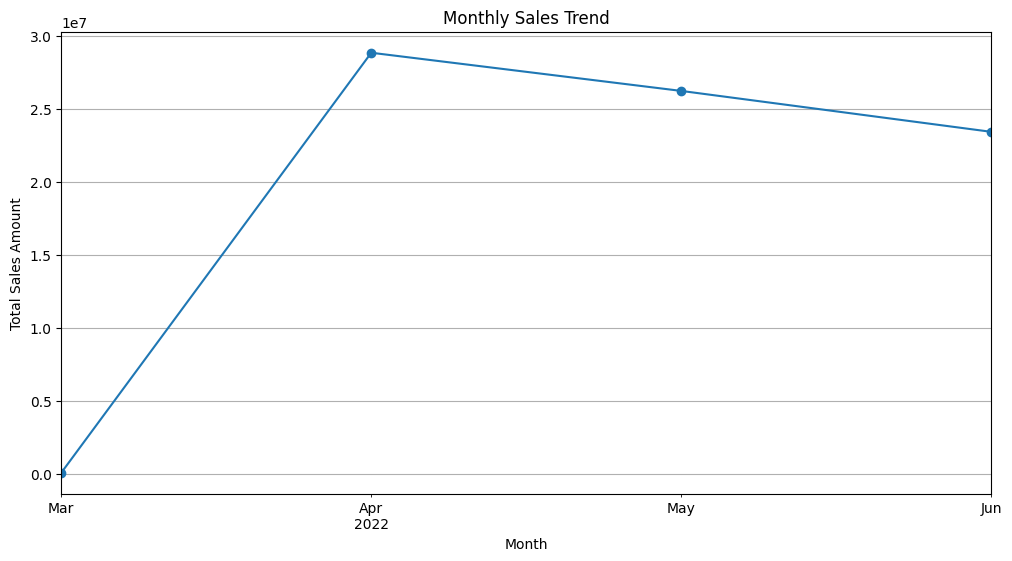

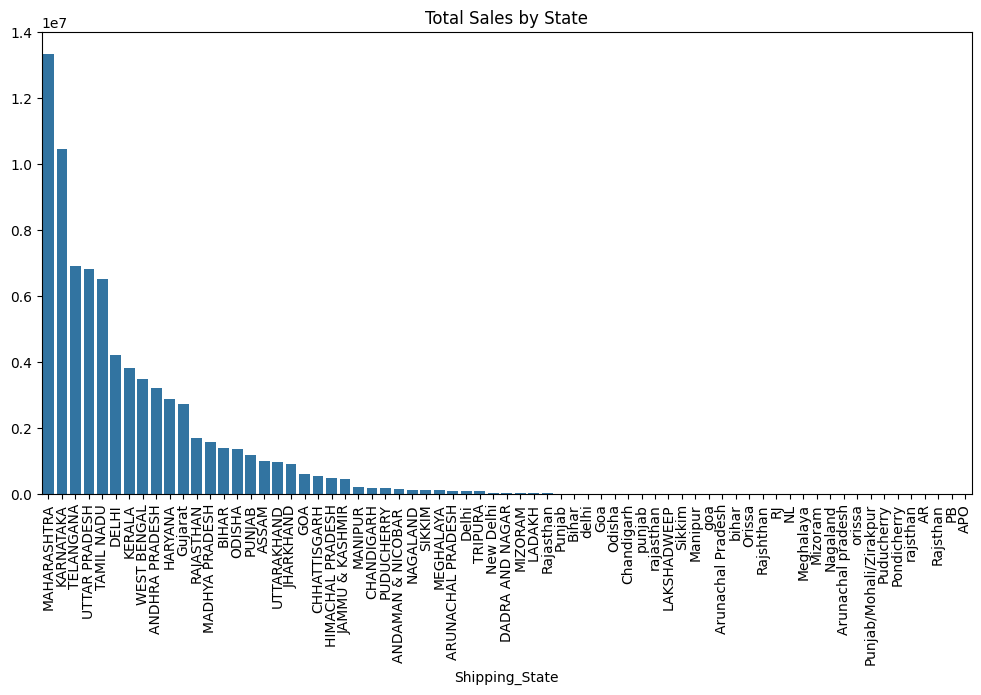

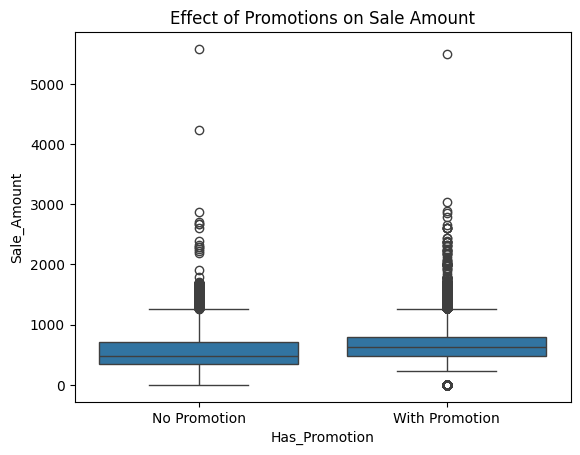

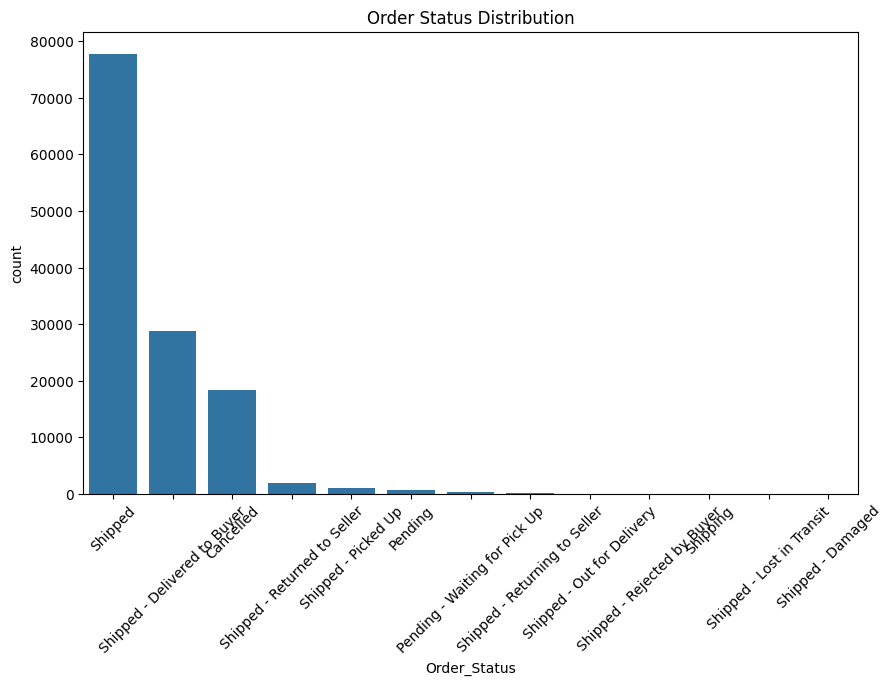

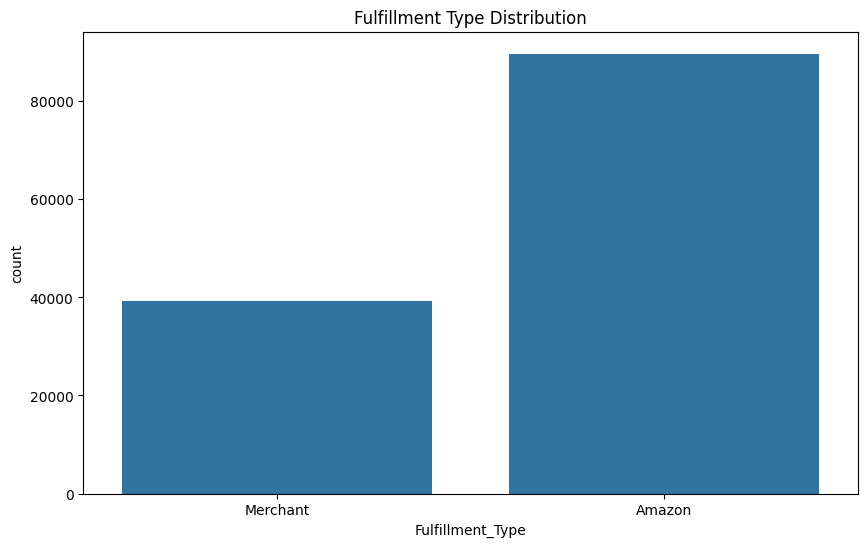

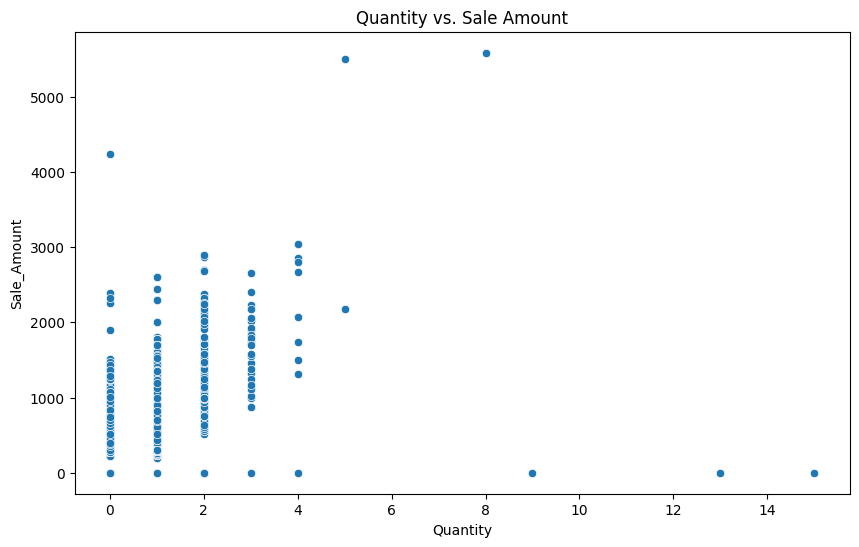

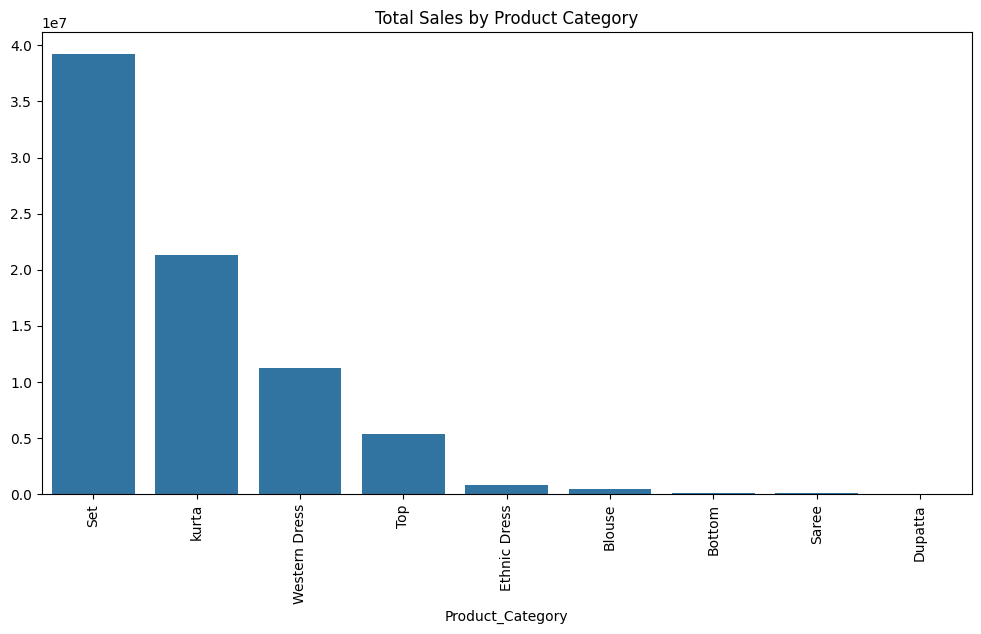

In [68]:



import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Overview
print(asr.info())
print(asr.describe())
print(asr.head())

# Convert Order_Date to datetime if not already
asr['Order_Date'] = pd.to_datetime(asr['Order_Date'])

# Univariate Analysis
plt.figure(figsize=(10, 6))
sns.histplot(asr['Sale_Amount'], bins=30, kde=True)
plt.title('Distribution of Sale Amount')
plt.show()


# Correlation Heatmap (Only for Numerical Values)
plt.figure(figsize=(10, 8))
sns.heatmap(asr.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Time Series Analysis
asr['Month'] = asr['Order_Date'].dt.to_period('M')
monthly_sales = asr.groupby('Month')['Sale_Amount'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.show()

# State-wise Sales Visualization
state_sales = asr.groupby('Shipping_State')['Sale_Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=state_sales.index, y=state_sales.values)
plt.title('Total Sales by State')
plt.xticks(rotation=90)
plt.show()

# Sales with Promotions
asr['Has_Promotion'] = asr['Promotion_IDs'].apply(lambda x: 'No Promotion' if x == 'No Promotion' else 'With Promotion')
sns.boxplot(x='Has_Promotion', y='Sale_Amount', data=asr)
plt.title('Effect of Promotions on Sale Amount')
plt.show()
# Visualization: Order Status Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Order_Status', data=asr, order=asr['Order_Status'].value_counts().index)
plt.title('Order Status Distribution')
plt.xticks(rotation=45)
plt.show()

# Visualization: Fulfillment Type Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='Fulfillment_Type', data=asr)
plt.title('Fulfillment Type Distribution')
plt.show()

# Visualization: Quantity vs. Sale Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Sale_Amount', data=asr)
plt.title('Quantity vs. Sale Amount')
plt.show()

# Visualization: Product Category Sales
category_sales = asr.groupby('Product_Category')['Sale_Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Total Sales by Product Category')
plt.xticks(rotation=90)
plt.show()

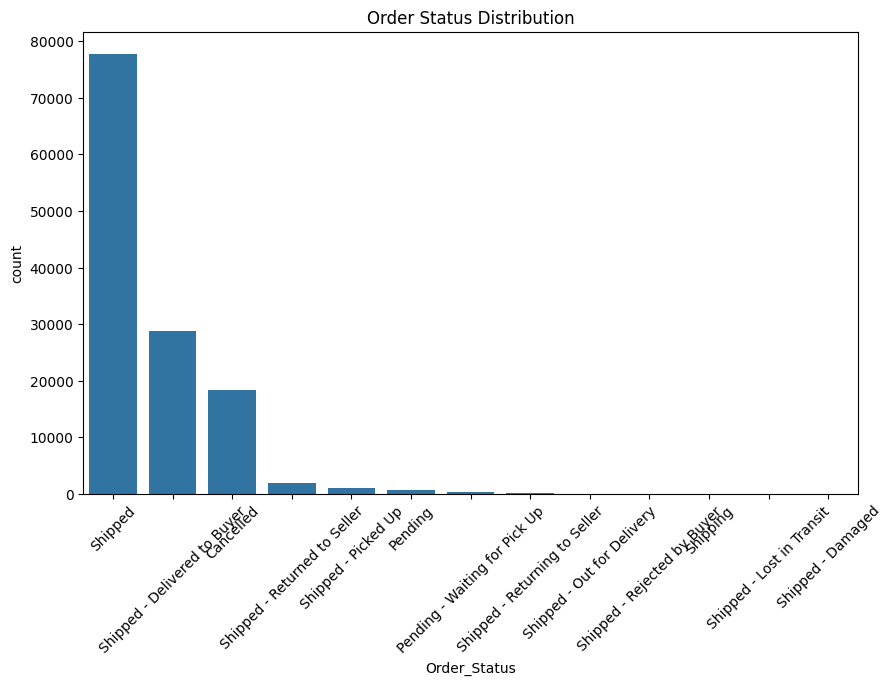

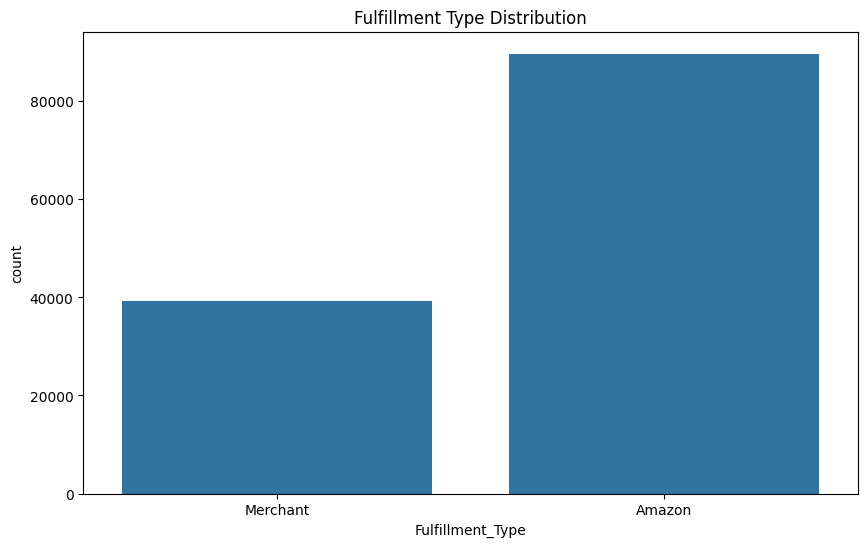

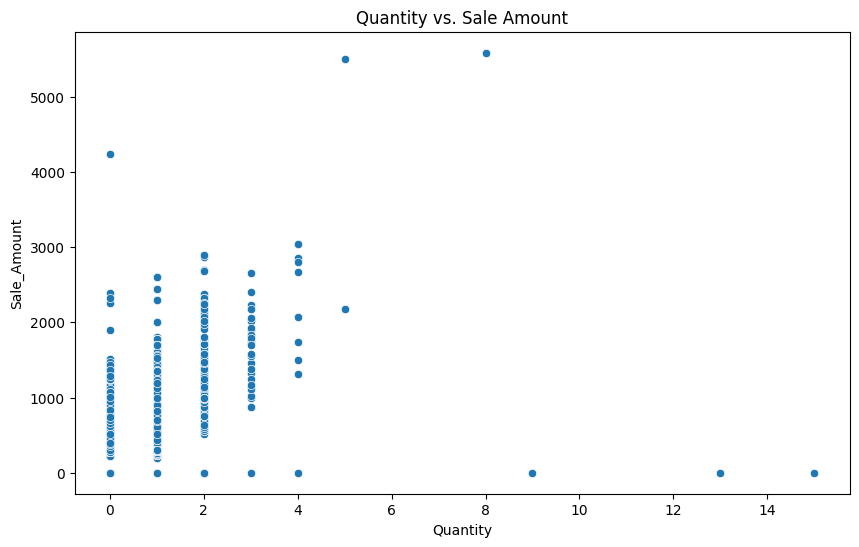

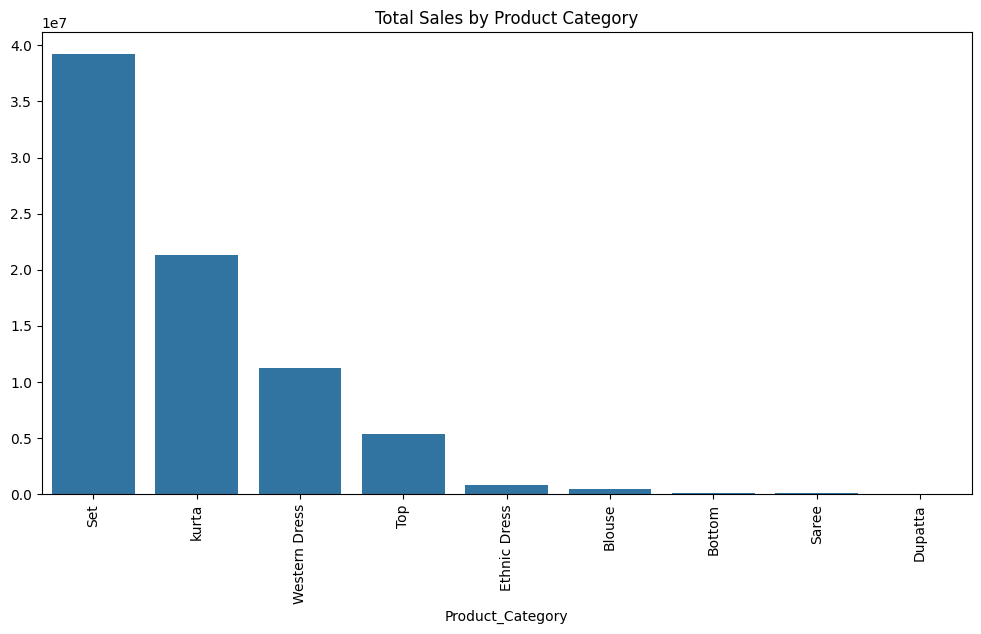

In [69]:
# Visualization: Order Status Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Order_Status', data=asr, order=asr['Order_Status'].value_counts().index)
plt.title('Order Status Distribution')
plt.xticks(rotation=45)
plt.show()

# Visualization: Fulfillment Type Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='Fulfillment_Type', data=asr)
plt.title('Fulfillment Type Distribution')
plt.show()

# Visualization: Quantity vs. Sale Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Sale_Amount', data=asr)
plt.title('Quantity vs. Sale Amount')
plt.show()

# Visualization: Product Category Sales
category_sales = asr.groupby('Product_Category')['Sale_Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Total Sales by Product Category')
plt.xticks(rotation=90)
plt.show()

## **International Sales Report**

<class 'pandas.core.frame.DataFrame'>
Index: 34957 entries, 0 to 37431
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Sale_Date           17218 non-null  datetime64[ns]
 1   Customer_Name       34957 non-null  object        
 2   Product_Style       34957 non-null  object        
 3   Product_SKU         34957 non-null  object        
 4   Product_Size        34957 non-null  object        
 5   Quantity_Purchased  34957 non-null  float64       
 6   Price_per_Unit      34957 non-null  float64       
 7   Gross_Amount        34957 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 2.4+ MB
None
                           Sale_Date  Quantity_Purchased  Price_per_Unit  \
count                          17218        34957.000000    34957.000000   
mean   2021-11-23 05:38:02.773841408          418.440291      828.722466   
min              2021-06-05 00:00

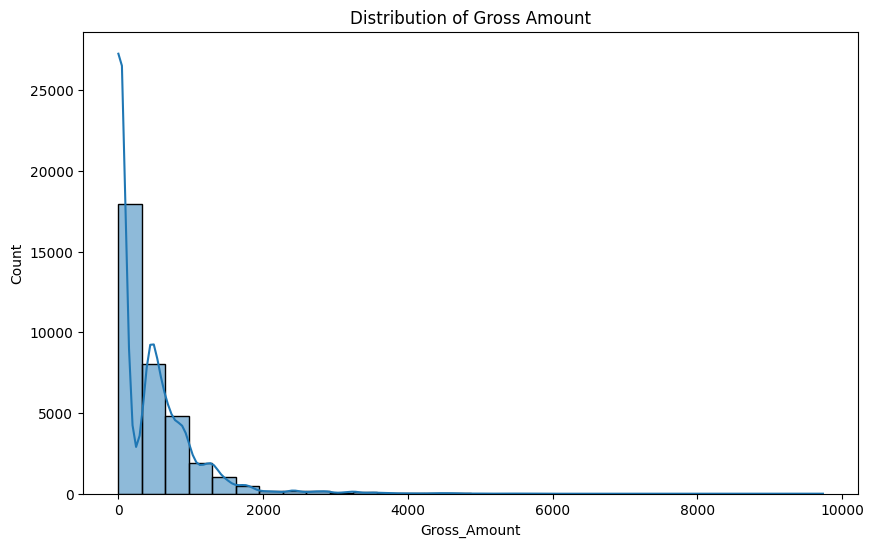

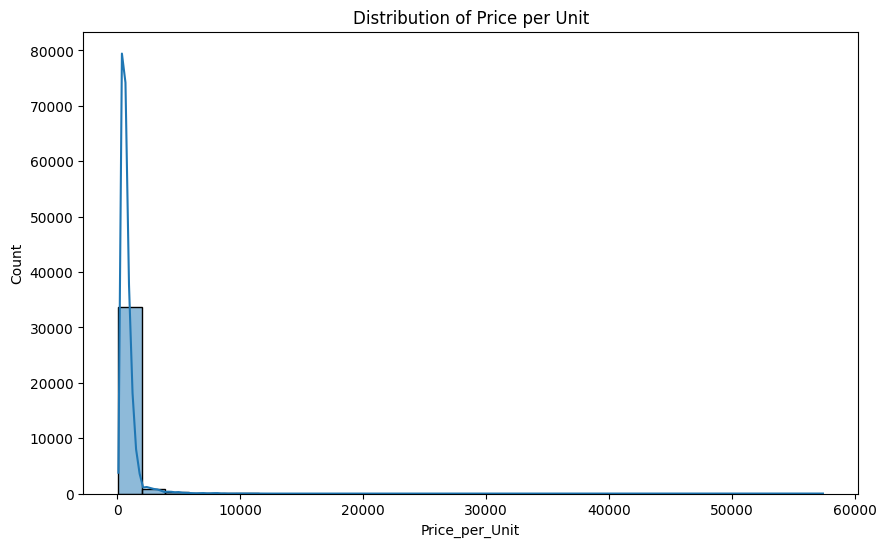

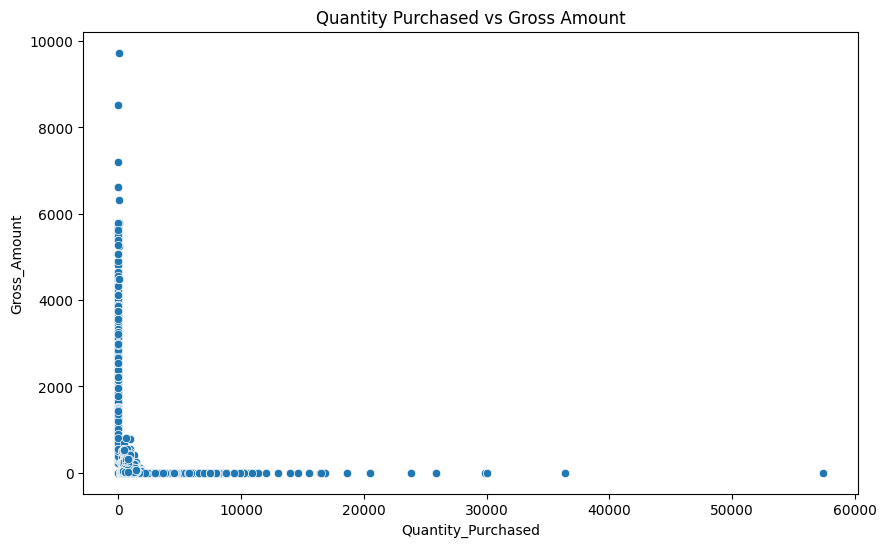

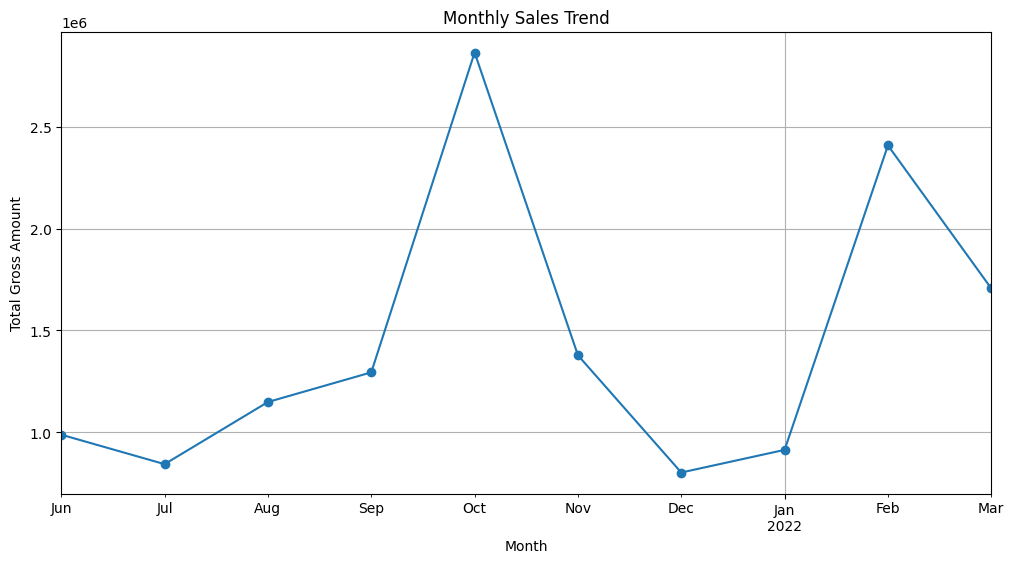

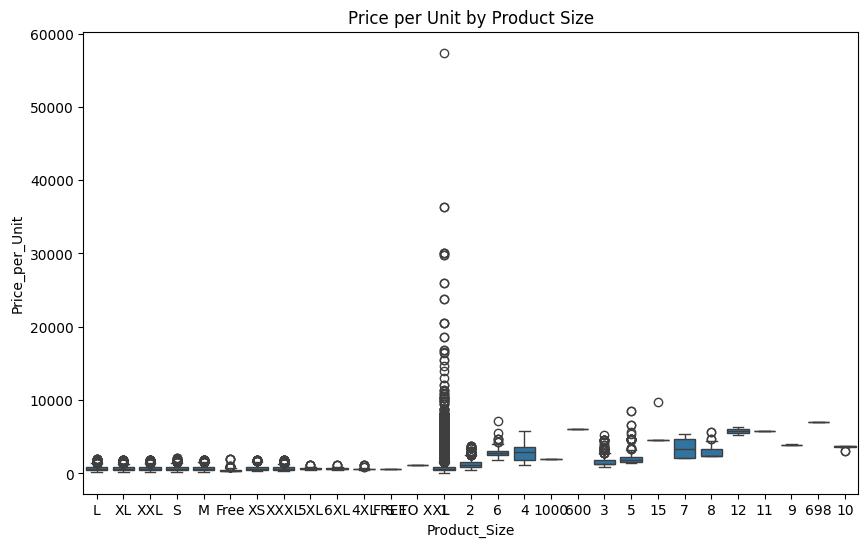

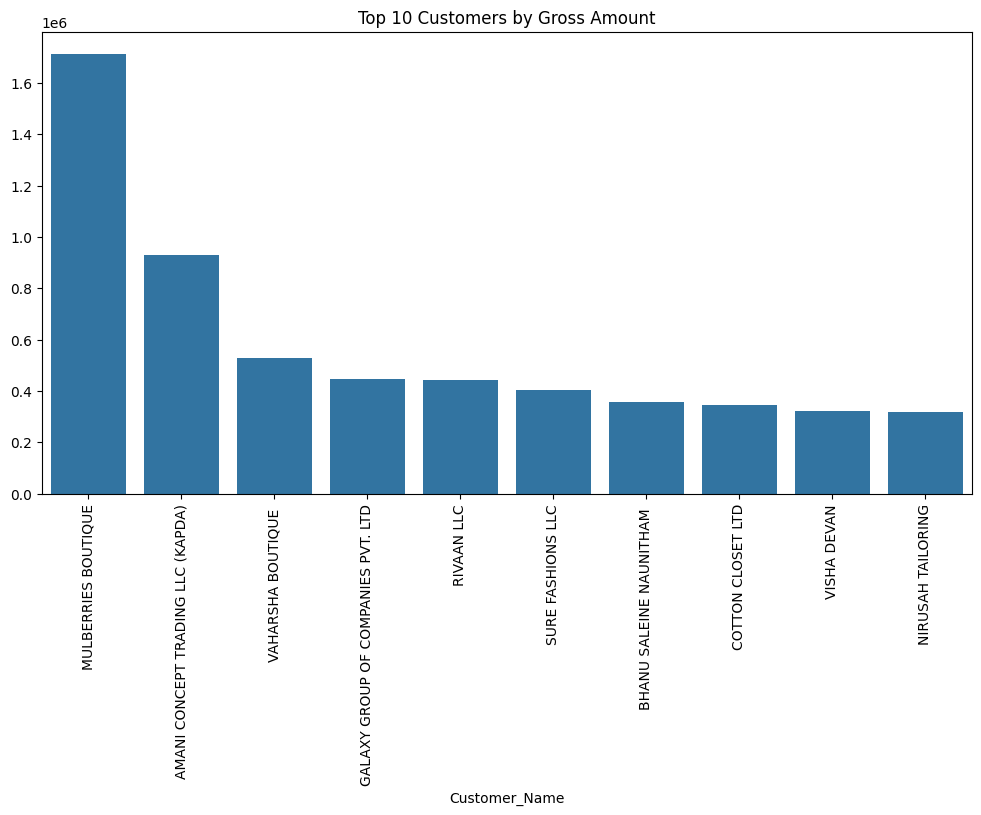

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Overview for isr
df = isr.copy()
df['Sale_Date'] = pd.to_datetime(df['Sale_Date'], errors='coerce')

print(df.info())
print(df.describe())
print(df.head())

# Univariate Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['Gross_Amount'], bins=30, kde=True)
plt.title('Distribution of Gross Amount')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Price_per_Unit'], bins=30, kde=True)
plt.title('Distribution of Price per Unit')
plt.show()

# Bivariate Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity_Purchased', y='Gross_Amount', data=df)
plt.title('Quantity Purchased vs Gross Amount')
plt.show()

# Time Series Analysis
monthly_sales = df.groupby(df['Sale_Date'].dt.to_period('M'))['Gross_Amount'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Gross Amount')
plt.grid(True)
plt.show()

# Product Style Analysis
product_sales = df.groupby('Product_Style')['Gross_Amount'].sum().sort_values(ascending=False)


# Product Size Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product_Size', y='Price_per_Unit', data=df)
plt.title('Price per Unit by Product Size')
plt.show()

# Customer Purchase Behavior
top_customers = df.groupby('Customer_Name')['Gross_Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_customers.index, y=top_customers.values)
plt.title('Top 10 Customers by Gross Amount')
plt.xticks(rotation=90)
plt.show()

# **Sale Report EDA**

In [71]:
sr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9188 entries, 0 to 9234
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_SKU       9188 non-null   object
 1   Design_Number     9188 non-null   object
 2   Stock_Level       9188 non-null   int64 
 3   Product_Category  9188 non-null   object
 4   Product_Size      9188 non-null   object
 5   Product_Color     9188 non-null   object
dtypes: int64(1), object(5)
memory usage: 502.5+ KB


<class 'pandas.core.frame.DataFrame'>
Index: 9188 entries, 0 to 9234
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_SKU       9188 non-null   object
 1   Design_Number     9188 non-null   object
 2   Stock_Level       9188 non-null   int64 
 3   Product_Category  9188 non-null   object
 4   Product_Size      9188 non-null   object
 5   Product_Color     9188 non-null   object
dtypes: int64(1), object(5)
memory usage: 502.5+ KB
None
       Stock_Level
count  9188.000000
mean     26.378973
std      58.582786
min       0.000000
25%       3.000000
50%       8.000000
75%      31.000000
max    1234.000000
     Product_SKU Design_Number  Stock_Level Product_Category Product_Size  \
0    AN201-RED-L         AN201            5    AN : LEGGINGS            L   
1    AN201-RED-M         AN201            5    AN : LEGGINGS            M   
2    AN201-RED-S         AN201            3    AN : LEGGINGS            

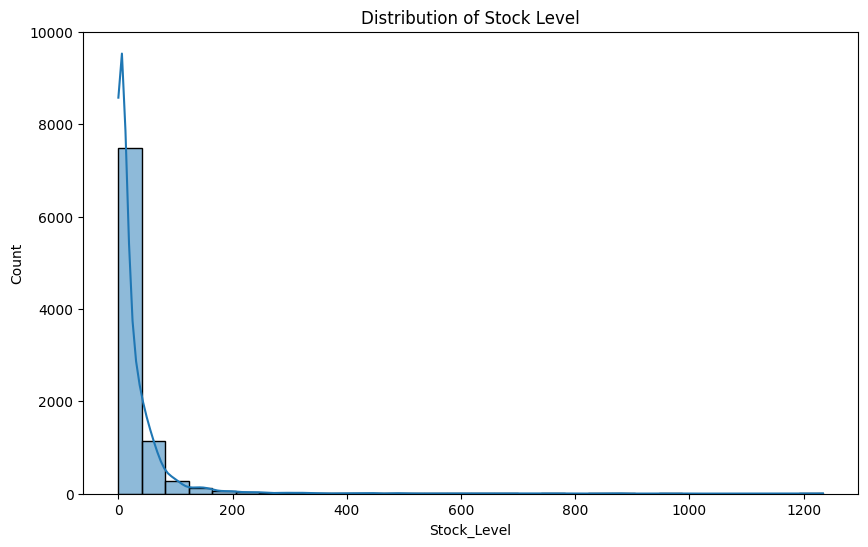

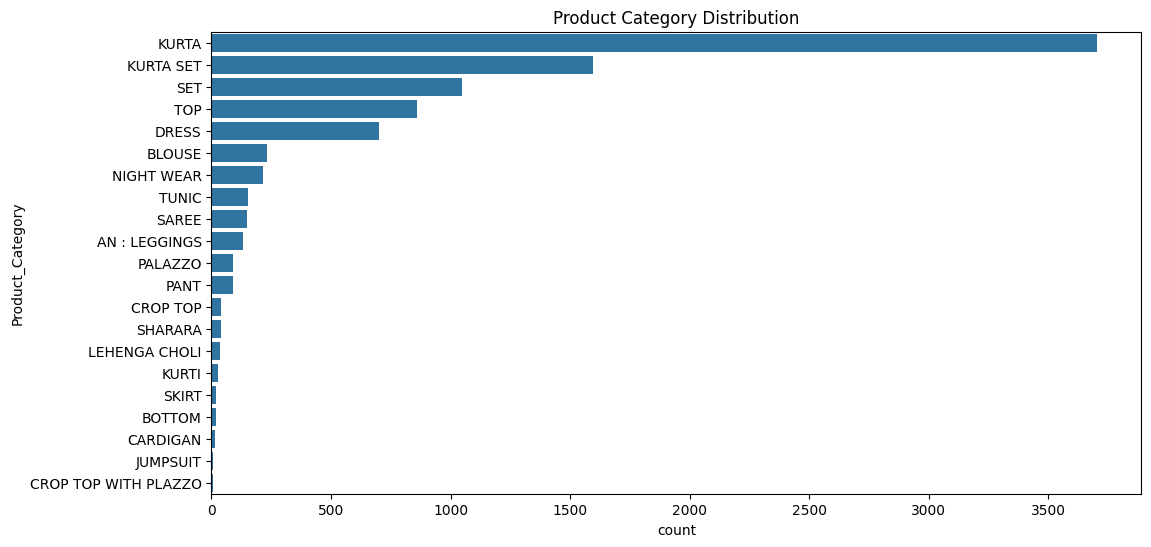

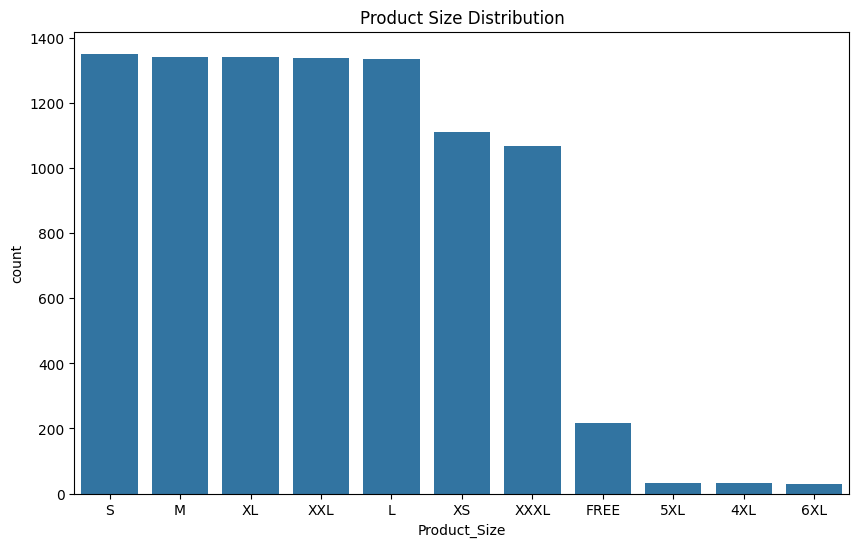

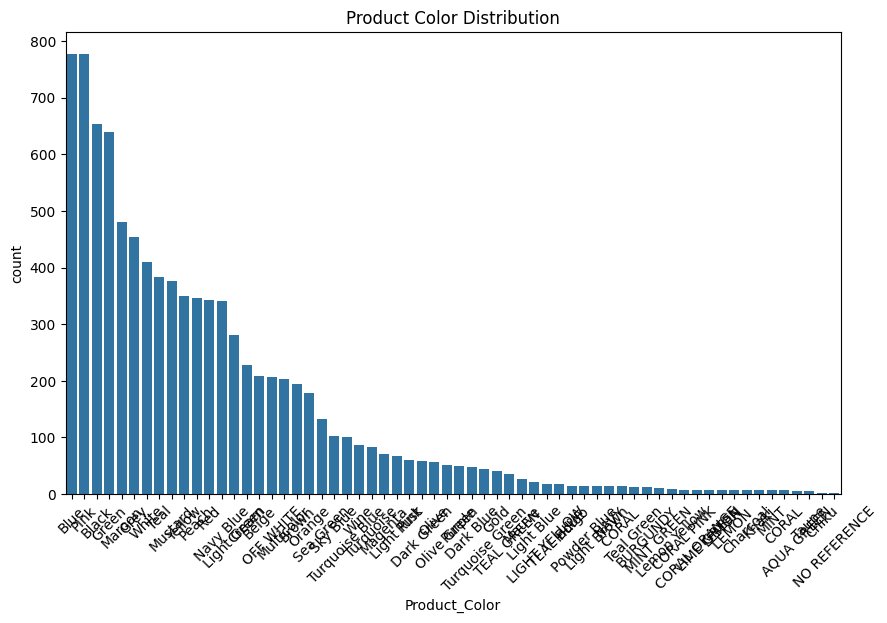

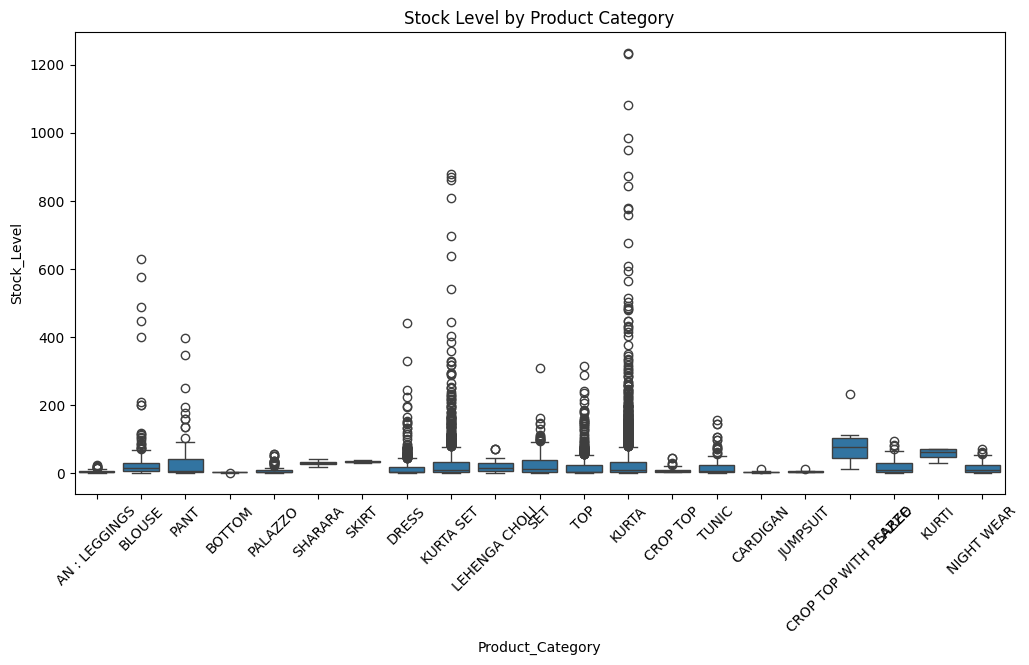

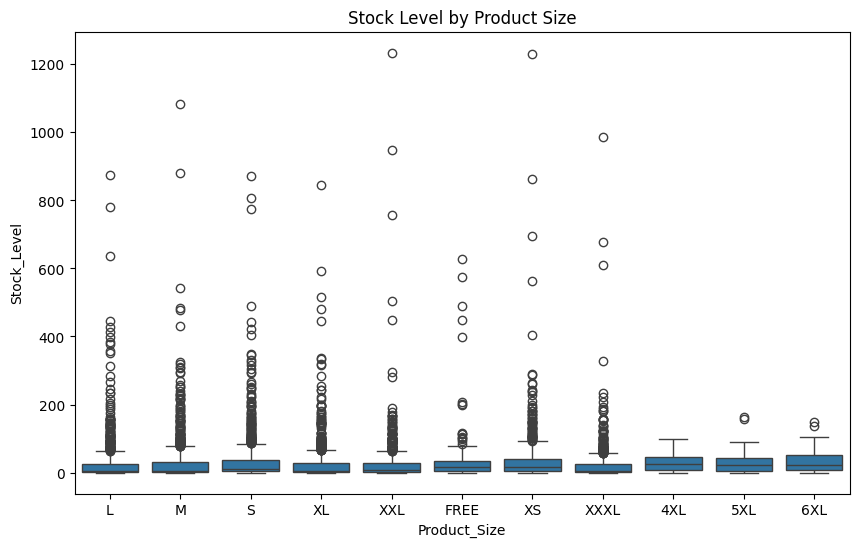

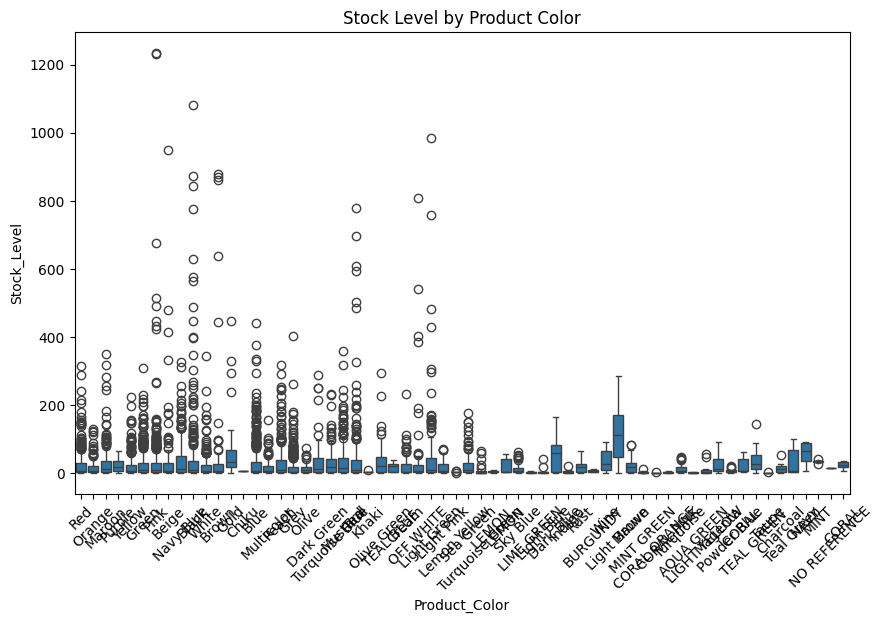

In [72]:

# Data Overview for sr
df = sr.copy()
print(df.info())
print(df.describe())
print(df.head())

# Univariate Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['Stock_Level'], bins=30, kde=True)
plt.title('Distribution of Stock Level')
plt.show()

# Product Category Analysis
plt.figure(figsize=(12, 6))
sns.countplot(y='Product_Category', data=df, order=df['Product_Category'].value_counts().index)
plt.title('Product Category Distribution')
plt.show()

# Product Size Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='Product_Size', data=df, order=df['Product_Size'].value_counts().index)
plt.title('Product Size Distribution')
plt.show()

# Product Color Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='Product_Color', data=df, order=df['Product_Color'].value_counts().index)
plt.title('Product Color Distribution')
plt.xticks(rotation=45)
plt.show()

# Stock Level by Product Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product_Category', y='Stock_Level', data=df)
plt.title('Stock Level by Product Category')
plt.xticks(rotation=45)
plt.show()

# Stock Level by Product Size
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product_Size', y='Stock_Level', data=df)
plt.title('Stock Level by Product Size')
plt.show()

# Stock Level by Product Color
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product_Color', y='Stock_Level', data=df)
plt.title('Stock Level by Product Color')
plt.xticks(rotation=45)
plt.show()